In [430]:
#Какая идея
#Собрать базу данных по венчурным компаниям из рызных индустрий и ппосмоотреть, насколько велик разброс оценки, 
#чтобы посмотреть насколько они эффективны 
#Проблема!!!
#Все данные платные, но можно получить временный доступ к одной из баз данных
#Но в ней максимально через кнопку можно экспортировтаь только 25 компаний из огромного множества
#Для обхода написал парсер через селениум, чтобы скачивать больше
#НО!!! Оказалось, что сайт умный и не позволяет парсеру скачать более 25 компаний, налагая ограниченяи на сам личный кабинет
#Однако я понял это совсем не сразу, и довольно долго кодил через селениум, пока не накткунлся на эту проблему 
#Эти данные нужны были мне как для курсовой, так и для дз по ноду
#Поэтому пришлось вручную собирать датасет, с которым я дальше работал (ссылка на него есть далее)
#
#Понимаю, что парсер не до конца работает, но надеюсь, что за навороты с селениумом смогу получить нормальные баллы
#за этот пункт. Да и сам парсер работает, только скачать больше 25 компаний не может
#Опять же, я понял, что он не работает не сразу, поэтому частично обрабатывал этот ограниченный датасет, 
#который получил с сайта
#

In [527]:
import numpy as np

In [2]:
!pip install selenium

In [528]:
import requests 
!pip install beautifulsoup4
from bs4 import BeautifulSoup

In [529]:
import time
time.sleep(3)

In [436]:
from selenium import webdriver

driver = webdriver.Chrome()

In [437]:
ref = 'http://google.com'
driver.get(ref)

In [438]:
stroka = driver.find_element_by_name("q")
stroka.click()

In [439]:
stroka.send_keys('dealroom')

In [440]:
button = driver.find_element_by_name('btnK')
button.click()

In [441]:
bs = BeautifulSoup(driver.page_source)

dirty_hrefs = bs.find_all('h3',attrs={'class':'r'})
clean_hrefs = [href.a['href'] for href in dirty_hrefs]
clean_hrefs

['https://app.dealroom.co/companies.startups',
 'https://app.dealroom.co/dashboard',
 'https://dealroom.co/about/',
 'https://dealroom.co/api/',
 'https://blog.dealroom.co/',
 'https://dealroom.co/press/']

In [442]:
driver.get(clean_hrefs[1])

In [443]:
#пробный период на этот аккаунт уже закончился, поэтому проверяющему, к сожалениЮ, нужно будет создать свой аккаунт на этом сайте
# И!!!!!! после регистрации надо будет запросить free trial, иначе без него будут видны только 5 компаний
# При регистрации следует указывать университетский или рабочий mail, тк личные он не дает зарегистрировать 
login = input()
password = input()
#egaliev_1@edu.hse.ru
#ilovenod777

egaliev_1@edu.hse.ru
ilovenod777


In [444]:
#нажимаем на кнопку логин
buttons = driver.find_element_by_class_name("login-button")
buttons.click()

In [445]:
# потом появится всплывающее окно справа. Его необходимо убрать вручную, иначе не получится вбить логин и пароль
# убрать это окно с помощью кода не удалось

In [447]:
#вводим логин
login_pole = driver.find_element_by_id('email')   # Находим поле для логина
login_pole.click()                                # Кликаем на это поле
login_pole.send_keys(login)                       # Заполняем его нашим мылом

In [448]:
#вводим пароль
passw_pole = driver.find_element_by_id('password')    # Находим поле для пароля
passw_pole.click()                                # Кликаем на это поле
passw_pole.send_keys(password)               # Заполняем его нашим паролем

In [449]:
login_buttom = driver.find_element_by_id('login') # находим кнопку для залогинивания
login_buttom.click()                              # Логинимся!

In [ ]:
# теперь появилось всплывающее окно слева. Его тоже надо убрать вручную

In [450]:
#заходим в раунды
rounds = driver.find_element_by_id("tooltip-6")
rounds.click()

In [451]:
#по-другому заходим в раунды
rounds_1=driver.find_elements_by_class_name("sidebar-menu-item__header")
rounds_1[4].click()
#<a class="sidebar-menu-item__header" itemprop="url name" href="/transactions.rounds"><span class="icon-font icon-tree sidebar-menu-item__icon"><svg width="1em" height="1em" viewBox="0 0 24 24" fill="none" aria-labelledby="funding-rounds-menu-item" style="width: 20px; height: 20px; font-size: 20px;"><g stroke-width="2" stroke-miterlimit="10"><path d="M5.25 12.75C5.25 7.5 12 1.5 12 1.5s6.75 6.063 6.75 11.25a6.75 6.75 0 01-13.5 0z" stroke-linecap="square"></path><path d="M12 8.25v15M7.5 23.25h9M8.25 12L12 15.75 15.75 12"></path></g></svg></span><span id="funding-rounds-menu-item" class="sidebar-menu-item__title">Funding rounds</span></a>

In [452]:
#добавляем фильтры
filt_1 = driver.find_element_by_class_name("button-advanced-facets")
filt_1.click()

In [453]:
#нажимаем на кнопку с раундами
click_rounds = driver.find_element_by_class_name("selectable-button")
click_rounds.click()
#<button type="button" class="selectable-button selectable-button--reverse">Round</button>

In [454]:
wind = driver.find_elements_by_class_name('selectable-button')
print(wind)
#<button type="button" class="selectable-button selectable-button--reverse">Locations</button>

[<selenium.webdriver.remote.webelement.WebElement (session="53bd29f77b69719ec782a514ec60395b", element="a706d8a2-0631-43c7-9c1d-ff4b39b7fe8b")>, <selenium.webdriver.remote.webelement.WebElement (session="53bd29f77b69719ec782a514ec60395b", element="6237db8f-c671-4103-a43a-cfed93c90b87")>, <selenium.webdriver.remote.webelement.WebElement (session="53bd29f77b69719ec782a514ec60395b", element="93330a44-6b64-442c-9c5e-13f7c85f1f8b")>, <selenium.webdriver.remote.webelement.WebElement (session="53bd29f77b69719ec782a514ec60395b", element="5b305c62-5144-4c2f-a968-d872151f08fa")>, <selenium.webdriver.remote.webelement.WebElement (session="53bd29f77b69719ec782a514ec60395b", element="231ef089-b6c0-436a-a736-6898b842714a")>, <selenium.webdriver.remote.webelement.WebElement (session="53bd29f77b69719ec782a514ec60395b", element="632fa2b9-1ffc-4175-b20d-f911b27e85c4")>]


In [455]:
wind[3].click()

In [456]:
#выбираем раунд А
series_A = driver.find_elements_by_class_name("control_indicator")
series_A[10].click()
#<div class="control_indicator"></div>

In [457]:
#выбираем отрасль("бизнес")
wind[1].click()

In [458]:
education = driver.find_elements_by_class_name("control_indicator")
education[8].click()

In [459]:
#применяем фильтры
driver.find_element_by_class_name('button-dark').click()
#<button type="submit" class="button button-dark button-medium">Apply</button>

In [460]:
# парсим сайт, чтобы найти фильтры, которых нет в предущей таблице
bs_2 = BeautifulSoup(driver.page_source)
#<ul class="item-list-column"><li><a href="/transactions.rounds/f/industries/anyof_education/rounds/anyof_SERIES%20A"> education </a></li><li><a href="/transactions.rounds/f/industries/anyof_education_kids/rounds/anyof_SERIES%20A"> kids </a></li></ul>

In [461]:
dirty_hrefs_2 = bs_2.find_all('div',attrs={'class':'markets-column'})
print(dirty_hrefs_2)
#<div class="markets-column"><ul class="item-list-column item-list-column--horizontal"></ul><ul class="item-list-column"><li><a href="/transactions.rounds/f/industries/anyof_education/rounds/anyof_SERIES%20A"> education </a></li><li><a href="/transactions.rounds/f/industries/anyof_education_kids/rounds/anyof_SERIES%20A"> kids </a></li></ul></div>

[<div class="markets-column"><ul class="item-list-column item-list-column--horizontal"></ul><ul class="item-list-column"><li><a href="/transactions.rounds/f/industries/anyof_education/rounds/anyof_SERIES%20A"> education </a></li><li><a href="/transactions.rounds/f/industries/anyof_education_kids/rounds/anyof_SERIES%20A"> kids </a></li></ul></div>, <div class="markets-column"><ul class="item-list-column item-list-column--horizontal"></ul><ul class="item-list-column"><li><a href="/transactions.rounds/f/industries/anyof_education/rounds/anyof_SERIES%20A"> education </a></li><li><a href="/transactions.rounds/f/industries/anyof_education_kids/rounds/anyof_SERIES%20A"> kids </a></li></ul></div>, <div class="markets-column"><ul class="item-list-column item-list-column--horizontal"></ul><ul class="item-list-column"><li><a href="/transactions.rounds/f/industries/anyof_education/rounds/anyof_SERIES%20A"> education </a></li></ul></div>, <div class="markets-column"><ul class="item-list-column item

In [462]:
clean_hrefs_2 = ['https://app.dealroom.co' + href.a['href'] for href in dirty_hrefs_2]


In [463]:
clean_hrefs_2

['https://app.dealroom.co/transactions.rounds/f/industries/anyof_education/rounds/anyof_SERIES%20A',
 'https://app.dealroom.co/transactions.rounds/f/industries/anyof_education/rounds/anyof_SERIES%20A',
 'https://app.dealroom.co/transactions.rounds/f/industries/anyof_education/rounds/anyof_SERIES%20A',
 'https://app.dealroom.co/transactions.rounds/f/industries/anyof_education/rounds/anyof_SERIES%20A',
 'https://app.dealroom.co/transactions.rounds/f/industries/anyof_education/rounds/anyof_SERIES%20A',
 'https://app.dealroom.co/transactions.rounds/f/industries/anyof_education/rounds/anyof_SERIES%20A',
 'https://app.dealroom.co/transactions.rounds/f/industries/anyof_education/rounds/anyof_SERIES%20A',
 'https://app.dealroom.co/transactions.rounds/f/industries/anyof_education_security/rounds/anyof_SERIES%20A',
 'https://app.dealroom.co/transactions.rounds/f/industries/anyof_education/rounds/anyof_SERIES%20A',
 'https://app.dealroom.co/transactions.rounds/f/industries/anyof_education/rounds/

In [464]:
clean_hrefs_2 = np.unique(clean_hrefs_2)

In [465]:
clean_hrefs_2

array(['https://app.dealroom.co/transactions.rounds/f/industries/anyof_education/rounds/anyof_SERIES%20A',
       'https://app.dealroom.co/transactions.rounds/f/industries/anyof_education_media/rounds/anyof_SERIES%20A',
       'https://app.dealroom.co/transactions.rounds/f/industries/anyof_education_real%20estate/rounds/anyof_SERIES%20A',
       'https://app.dealroom.co/transactions.rounds/f/industries/anyof_education_security/rounds/anyof_SERIES%20A',
       'https://app.dealroom.co/transactions.rounds/f/industries/anyof_education_telecom/rounds/anyof_SERIES%20A'],
      dtype='<U110')

In [466]:
clean_hrefs_2[-1]

'https://app.dealroom.co/transactions.rounds/f/industries/anyof_education_telecom/rounds/anyof_SERIES%20A'

In [495]:
driver.get(clean_hrefs_2[4])

In [ ]:
# далее я пытался вставить и другие ссылки-фильтры, но как только я вставлял одну, он забывал предыдущую

In [467]:
# driver.get(clean_hrefs_2[3])

In [249]:
#driver.get(clean_hrefs_2[3])

In [235]:
#driver.get(clean_hrefs_2[4])

In [468]:
tree = BeautifulSoup(driver.page_source)

In [470]:
#вот тут парсю блок с компаниями, но он всегда останавливается на 25 из-за вышеописанной проблемы
company =  tree.find_all('div', {'class' : 'table-list-item'})
print(len(company))
company[1]
#<div class="table-list-item" style="opacity: 1; transition: opacity 0.1s ease 0s; transform: translate3d(0px, 0px, 0px); height: 90px; z-index: 0;"><div class="table-list-columns-fixed hbox"><div class="table-list-column name"><div class="name-column-wrapper"><div class="image-wrapper"><img alt="Tech Will Save Us" src="https://s3-eu-west-1.amazonaws.com/dealroom-images/dc/NzQ6NzQ6Y29tcGFueUBzMy1ldS13ZXN0LTEuYW1hem9uYXdzLmNvbS9kZWFscm9vbS1pbWFnZXMvMjAxOC8xMS8yOS8zYzI3ZDEwNGEzMzQwODk0NjE1Y2YwZDFmYTBkNGVkYg==.jpg"></div><div class="info"><div class="name"><a href="/companies/technology_will_save_us_limited">Tech Will Save Us</a></div><div class="tagline">UK design-led, technology start-ups focused on learning</div></div></div></div></div><div class="table-list-columns"><div class="table-list-column investors"><ul class="item-list-column"><li><a href="/companies/seedrs"> Seedrs </a></li></ul></div><div class="table-list-column market"><div class="markets-column"><ul class="item-list-column item-list-column--horizontal"></ul><ul class="item-list-column"><li><a href="/transactions.rounds/f/industries/anyof_education/rounds/anyof_SERIES%20A"> education </a></li><li><a href="/transactions.rounds/f/industries/anyof_education_kids/rounds/anyof_SERIES%20A"> kids </a></li></ul></div></div><div class="table-list-column locations"><span>London</span></div><div class="table-list-column valuation"><span id="tooltip-7886" class="valuation"><span><span class="valuation__value">£2m - £3m</span></span></span></div><div class="table-list-column _amount"><div class="funding-round-cell-wrapper"><div>£440k SERIES A</div></div></div><div class="table-list-column date sorting">May 2020</div></div></div>

25


<div class="table-list-item scrolled" style="opacity: 1; transition: opacity 0.1s ease 0s; transform: translate3d(0px, 90px, 0px); height: 90px; z-index: 0;"><div class="table-list-columns-fixed hbox"><div class="table-list-column name"><div class="name-column-wrapper"><div class="image-wrapper"><img alt="LingoAce" src="https://s3-eu-west-1.amazonaws.com/dealroom-images/ab/NzQ6NzQ6Y29tcGFueUBzMy1ldS13ZXN0LTEuYW1hem9uYXdzLmNvbS9kZWFscm9vbS1pbWFnZXMvMjAyMC8wNi8wOC9hOWY3MmFkNGZkMTEwNWM4YWQ2YWU3YWEwZjg0YzMzZA==.jpg"/></div><div class="info"><div class="name"><a href="/companies/lingoace">LingoAce</a></div><div class="tagline">Online Chinese language learning platform for 6-15 years old students</div></div></div></div></div><div class="table-list-columns"><div class="table-list-column locations"><span>Singapore</span></div><div class="table-list-column valuation"><span class="valuation" id="tooltip-25"><span><span class="valuation__value">$28m - $42m</span></span></span></div><div class="ta

In [471]:
type(company)

bs4.element.ResultSet

In [472]:
len(company)

25

In [ ]:
#будем искать round,location,valuation,date,name

In [474]:
round_ = company[2].find('div', {'class' : 'funding-round-cell-wrapper'})
round_.text.strip('$ SERIES A').replace('m','00000')

'3.600000'

In [475]:
round_ = company[2].find('div', {'class' : 'funding-round-cell-wrapper'})
round_.text

'$3.6m SERIES A'

In [476]:
location = company[2].find('div', {'class' : 'table-list-column locations'})
location.text
#<div class="table-list-column locations"><span>London</span></div>

'London'

In [478]:
valuation = company[0].find('div', {'class' : 'table-list-column valuation'})
valuation.text
#<div class="table-list-column valuation"><span id="tooltip-7886" class="valuation"><span><span class="valuation__value">£2m - £3m</span></span></span></div>

'$30m - $45m'

In [479]:
date = company[0].find('div', {'class' : 'table-list-column date sorting'})
date.text
#<div class="table-list-column date sorting">May 2020</div>

'Jun 2020'

In [480]:
name = company[0].find('div', {'class' : 'name'})
name.a.text
#<div class="name"><a href="/companies/technology_will_save_us_limited">Tech Will Save Us</a></div>

'Ajar'

In [497]:
# тут разные валюты, поэтому отсеиваю все, кроме долларов.
# таким образом точно уходят китай и япония, поэтому нет смысла их отдельно убирать, так как они сами дропнуться, 
#когда я буду исключать всех с неправильной валютой
infa = []
currency = '$'
million = "m"
thousand = 'k'
dot ='.'
company =  tree.find_all('div', {'class' : 'table-list-item'})
for item in company:
    name = item.find('div', {'class' : 'name'})
    location = item.find('div', {'class' : 'table-list-column locations'})
    valuation = item.find('div', {'class' : 'table-list-column valuation'})
    date = item.find('div', {'class' : 'table-list-column date sorting'})
    round_A = item.find('div', {'class' : 'funding-round-cell-wrapper'})
    if currency in round_A.text:
        if million in round_A.text:
            if dot in round_A.text:
                round_int = round_A.text.strip('$ SERIES A').replace('m','00000') 
            else:
                round_int = round_A.text.strip('$ SERIES A').replace('m','000000')
        elif thousand in round_A.text:
            round_int = round_A.text.strip('$ SERIES A').replace('k','000')
        else:
            round_int = round_A.text.strip('$ SERIES A')
    else:
        round_int = 'вал_непр'
    infa.append({'name': name.a.text,
                     'location': location.text,
                     'valuation': valuation.text,
                     'date': date.text,
                     'round_A': round_int})

In [482]:
infa

[{'name': 'Ajar',
  'location': 'Kuwait City',
  'valuation': '$30m - $45m',
  'date': 'Jun 2020',
  'round_A': '7.500000'},
 {'name': 'LingoAce',
  'location': 'Singapore',
  'valuation': '$28m - $42m',
  'date': 'Jun 2020',
  'round_A': '7000000'},
 {'name': 'Hubble HQ',
  'location': 'London',
  'valuation': '$14m - $22m',
  'date': 'Jun 2020',
  'round_A': '3.600000'},
 {'name': 'Nesto',
  'location': 'Montreal',
  'valuation': 'CAD46m - CAD69m',
  'date': 'Jun 2020',
  'round_A': 'вал_непр'},
 {'name': 'Tech Will Save Us',
  'location': 'London',
  'valuation': '£2m - £3m',
  'date': 'May 2020',
  'round_A': 'вал_непр'},
 {'name': 'Growth Tribe',
  'location': 'Amsterdam',
  'valuation': '€12m - €18m',
  'date': 'May 2020',
  'round_A': 'вал_непр'},
 {'name': 'Northspyre',
  'location': 'New York',
  'valuation': '$30m - $45m',
  'date': 'May 2020',
  'round_A': '7.500000'},
 {'name': 'Briq',
  'location': 'Santa Barbara',
  'valuation': '$40m - $60m',
  'date': 'May 2020',
  'rou

In [483]:
#"опять двадцать пять"
len(infa)

25

In [498]:
import pandas as pd

df = pd.DataFrame(infa)
print(df.shape)
df

(25, 5)


,name,location,valuation,date,round_A
0,Ajar,Kuwait City,$30m - $45m,Jun 2020,7.500000
1,LingoAce,Singapore,$28m - $42m,Jun 2020,7000000
2,Hubble HQ,London,$14m - $22m,Jun 2020,3.600000
3,Nesto,Montreal,CAD46m - CAD69m,Jun 2020,вал_непр
4,Tech Will Save Us,London,£2m - £3m,May 2020,вал_непр
5,Growth Tribe,Amsterdam,€12m - €18m,May 2020,вал_непр
6,Northspyre,New York,$30m - $45m,May 2020,7.500000
7,Briq,Santa Barbara,$40m - $60m,May 2020,10000000
8,StructionSite,San Francisco,$28m - $42m,May 2020,7000000
9,IntelliBoard,Monroe,$14m - $20m,May 2020,3.400000


In [506]:
df = df.drop(np.where(df['round_A'] == 'вал_непр')[0])
df

,name,location,valuation,date,round_A
0,Ajar,Kuwait City,$30m - $45m,Jun 2020,7.500000
1,LingoAce,Singapore,$28m - $42m,Jun 2020,7000000
2,Hubble HQ,London,$14m - $22m,Jun 2020,3.600000
6,Northspyre,New York,$30m - $45m,May 2020,7.500000
7,Briq,Santa Barbara,$40m - $60m,May 2020,10000000
8,StructionSite,San Francisco,$28m - $42m,May 2020,7000000
9,IntelliBoard,Monroe,$14m - $20m,May 2020,3.400000
10,Locatee,Zurich,$16m - $24m,May 2020,4000000
11,Different,Darlinghurst,$28m - $43m,May 2020,7.100000
13,BibliU,London,$40m - $60m,Apr 2020,10000000


In [512]:
#удаляем "нет данных" по раунду
df = df.drop(np.where(df['round_A'] == 'N/')[0])
print(len(df))
df

16


,name,location,valuation,date,round_A
0,Ajar,Kuwait City,$30m - $45m,Jun 2020,7.500000
1,LingoAce,Singapore,$28m - $42m,Jun 2020,7000000
2,Hubble HQ,London,$14m - $22m,Jun 2020,3.600000
6,Northspyre,New York,$30m - $45m,May 2020,7.500000
7,Briq,Santa Barbara,$40m - $60m,May 2020,10000000
8,StructionSite,San Francisco,$28m - $42m,May 2020,7000000
9,IntelliBoard,Monroe,$14m - $20m,May 2020,3.400000
10,Locatee,Zurich,$16m - $24m,May 2020,4000000
11,Different,Darlinghurst,$28m - $43m,May 2020,7.100000
13,BibliU,London,$40m - $60m,Apr 2020,10000000


In [530]:
# тут я понял, что спарсить этот сайт не получится, поэтому собрал данные вручну.
#импортируруем эксель файлы, чтобы сделать из них датафреймы
#вот ссылка на собранный датасет
# https://yadi.sk/d/oD8U_mKQWLIu-g

df_vc = pd.read_csv('C:\\Users\\svzab\\OneDrive\\Desktop\\VC_rec.csv',sep = ';')
df_vc

,Company,Industry,Valuation,Round_A
0,Prilenia Therapeutics,MedTech,250 000 000 -375 000 000,62500000.0
1,Monte Rosa Therapeutics,MedTech,130 000 000 -195 000 000,32500000.0
2,Accure Therapeutics,MedTech,30 000 000 - 46 000 000,7600000.0
3,Day One Biopharma,MedTech,240 000 000 - 360 000 000,60000000.0
4,Good Therapeutics,MedTech,44 000 000 - 66 000 000,11000000.0
...,...,...,...,...
203,17zuoye,EdTech,1 000 000 000,5000000.0
204,Smart Sparrow,EdTech,30 000 000 - 45 000 000,2000000.0
205,Everfi,EdTech,800 000 000,11000000.0
206,Sofatutor,EdTech,12 000 000 -18 000 000,NaN


In [531]:
df_vc.dtypes

Company       object
Industry      object
Valuation     object
Round_A      float64
dtype: object

In [532]:
#удаляем пропуски
df_vc = df_vc.dropna()
df_vc

,Company,Industry,Valuation,Round_A
0,Prilenia Therapeutics,MedTech,250 000 000 -375 000 000,62500000.0
1,Monte Rosa Therapeutics,MedTech,130 000 000 -195 000 000,32500000.0
2,Accure Therapeutics,MedTech,30 000 000 - 46 000 000,7600000.0
3,Day One Biopharma,MedTech,240 000 000 - 360 000 000,60000000.0
4,Good Therapeutics,MedTech,44 000 000 - 66 000 000,11000000.0
...,...,...,...,...
202,Vodeclic,EdTech,2 000 000 - 3 000 000,500000.0
203,17zuoye,EdTech,1 000 000 000,5000000.0
204,Smart Sparrow,EdTech,30 000 000 - 45 000 000,2000000.0
205,Everfi,EdTech,800 000 000,11000000.0


In [534]:
#для удобства переделываем в int
#чтобы он сработал надо запустить 2!!!! раза
df_vc.Round_A = df_vc.Round_A.astype('int64')
df_vc

,Company,Industry,Valuation,Round_A
0,Prilenia Therapeutics,MedTech,250 000 000 -375 000 000,62500000
1,Monte Rosa Therapeutics,MedTech,130 000 000 -195 000 000,32500000
2,Accure Therapeutics,MedTech,30 000 000 - 46 000 000,7600000
3,Day One Biopharma,MedTech,240 000 000 - 360 000 000,60000000
4,Good Therapeutics,MedTech,44 000 000 - 66 000 000,11000000
...,...,...,...,...
202,Vodeclic,EdTech,2 000 000 - 3 000 000,500000
203,17zuoye,EdTech,1 000 000 000,5000000
204,Smart Sparrow,EdTech,30 000 000 - 45 000 000,2000000
205,Everfi,EdTech,800 000 000,11000000


In [535]:
#создаем новый столбец, тк с ним визуализировать удобнее
#ошибка ни на что не влияет
df_vc['Round_A_mln'] = df_vc['Round_A'] / 1000000
df_vc

C:\Users\svzab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Company,Industry,Valuation,Round_A,Round_A_mln
0,Prilenia Therapeutics,MedTech,250 000 000 -375 000 000,62500000,62.5
1,Monte Rosa Therapeutics,MedTech,130 000 000 -195 000 000,32500000,32.5
2,Accure Therapeutics,MedTech,30 000 000 - 46 000 000,7600000,7.6
3,Day One Biopharma,MedTech,240 000 000 - 360 000 000,60000000,60.0
4,Good Therapeutics,MedTech,44 000 000 - 66 000 000,11000000,11.0
...,...,...,...,...,...
202,Vodeclic,EdTech,2 000 000 - 3 000 000,500000,0.5
203,17zuoye,EdTech,1 000 000 000,5000000,5.0
204,Smart Sparrow,EdTech,30 000 000 - 45 000 000,2000000,2.0
205,Everfi,EdTech,800 000 000,11000000,11.0


In [536]:
#разделяем датафрейм на индустрии
df_edtech = df_vc[df_vc['Industry']=='EdTech'].copy()
df_medtech = df_vc[df_vc['Industry']=='MedTech'].copy()
df_gaming = df_vc[df_vc['Industry']=='Gaming'].copy()

In [537]:
# смотрим размер датафреймов
print(df_edtech.shape)
print(df_medtech.shape)
print(df_gaming.shape)

(65, 5)
(53, 5)
(70, 5)


In [538]:
df_edtech

,Company,Industry,Valuation,Round_A,Round_A_mln
132,IntelliBoard,EdTech,14 000 000 - 20 000 000,3400000,3.4
133,BibliU,EdTech,40 000 000-60 000 000,10000000,10.0
134,Frame AI,EdTech,25 000 000- 38 000 000,6300000,6.3
135,Pulse Q&A,EdTech,26 000 000- 39 000 000,6500000,6.5
136,Honorlock,EdTech,46 000 000 - 69 000 000,11500000,11.5
...,...,...,...,...,...
202,Vodeclic,EdTech,2 000 000 - 3 000 000,500000,0.5
203,17zuoye,EdTech,1 000 000 000,5000000,5.0
204,Smart Sparrow,EdTech,30 000 000 - 45 000 000,2000000,2.0
205,Everfi,EdTech,800 000 000,11000000,11.0


In [539]:
gaming_mean = df_gaming.Round_A_mln.median()
edtech_mean = df_edtech.Round_A_mln.median()
medtech_mean = df_medtech.Round_A_mln.median()
print(gaming_mean)
print(edtech_mean)
print(medtech_mean)

5.0
6.0
15.5


In [540]:
gaming_std = df_gaming.Round_A_mln.std()
edtech_std = df_edtech.Round_A_mln.std()
medtech_std = df_medtech.Round_A_mln.std()
print(gaming_std)
print(edtech_std)
print(medtech_std)

9.754318782305214
5.835894504140864
22.511495047837766


In [541]:
import seaborn as sns
import matplotlib.pyplot as plt

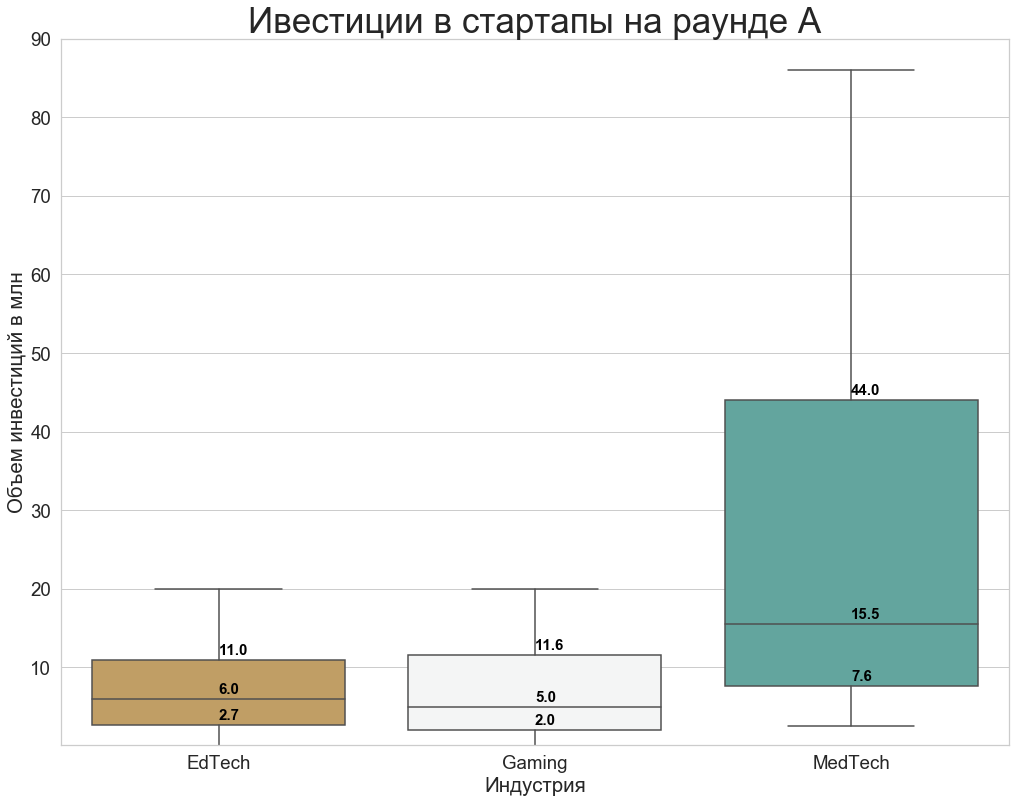

In [554]:
# В чем инсайт !!!!
# Были выбраны компании максимально схожие. То есть не просто индустрия гейминга, edtech , medtech. А по геймингу были 
#По геймингу были выбраны конкретно игровые платформы и разработчки (без беттинга, e-sports, мобильных и настольных игр)
#По edtech`у были выбраны только образовательные платформы вроде курсеры(бещ отраслей enterprise software,fintech,
# jobs recruitment и др)
# по medtech`у только терапевтические компании, которые занимаются конкретными заболеваниям ( не фарма, не биохакинг, 
# не приложения для телефоноа)

# Все данные по раунда А, те это ранняя стадия развития компании. Это значит, что у компнаии есть только концепт, прототип
# Не факт, что она начала продавть свою продукцию или хотя бы наладила производственый процесс. Т.е у них еще нет как таковых 
#материальных активов и других параметров, на которых базируются стандартные методы венчурной оценки 
# CAPM и ее производные, DCF,Comparables analysis, venture capital method  и другие

# Идея : если большой разброс оценки, то это оценка не очень эффективная для компаний на ранних стадиях
# так как оценка в базах данных обычно основывается на вышеописанных консервативных методах, то здесь видно, что у оценки 
# действительно очень большой разброс, что говорит о неээфективности текущих методов оценки для early stage companies

fig, ax = plt.subplots()
sns.set(style="whitegrid",font_scale = 1.7)
ax = sns.boxplot(x = 'Industry', y="Round_A_mln",
                 data=df_vc, palette="BrBG",sym = '',order=["EdTech", "Gaming","MedTech"])
medians = df_vc.groupby(['Industry'])['Round_A_mln'].median()
vertical_offset = df_vc['Round_A_mln'].median()*0.1

quantiles_25 = round(df_vc.groupby(['Industry'])['Round_A_mln'].quantile(.25),1)
quantiles_75 = round(df_vc.groupby(['Industry'])['Round_A_mln'].quantile(.75),1)

ax.set_title('Ивестиции в стартапы на раунде А',size=35)
ax.set_ylabel('Объем инвестиций в млн')
ax.set_xlabel('Индустрия')

for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='left',size=15,color='black',weight='bold')
    ax.text(xtick,quantiles_25[xtick] + vertical_offset,quantiles_25[xtick], 
            horizontalalignment='left',size=15,color='black',weight='bold')
    ax.text(xtick,quantiles_75[xtick] + vertical_offset,quantiles_75[xtick], 
            horizontalalignment='left',size=15,color='black',weight='bold')
ax.set(ylim=(0.1,90))
fig.set_size_inches(17, 13)

In [555]:
fig.savefig('example.png')